In [1]:
# Importing necessary modules
import numpy as np#
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from datetime import datetime, timedelta
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_sun, get_body

<div class="alert alert-block alert-success">
<b> Key Question </b> 
How do we convey the positions of stars in the night sky to people who are observing from a different place on the Earths surface, or who live at different time to us?
</div>

# Positional Astronomy

Now that we've explored the various models for the solar system, and convinced ourselves that the Heliocentric model is the way to go, let's discuss positional astronomy - that is, assignging co-ordinates to objects which are understandable from various locations on the Earths surface and at different times. There are several things we need to account for, such as the rotation of the Earth, the orbit of the Earth around the Sun, and the precession of the Earths axis. 

To start, we're going to use a geocentric frame as shown below.

![Celestial Sphere](Figures/Figure_1.png)

In this coordinate system, and due to the Earths tilt of 23.5 degrees relative to the orbital plane, the sun follows a path throughout the year known as the **ecliptic**. The below piece of code shows the position of the sun on the celestial sphere when viewed from Earth throughout the year. Note that the x-axis is inverted. This is because RA is measured Eastwards from the vernal equinox.

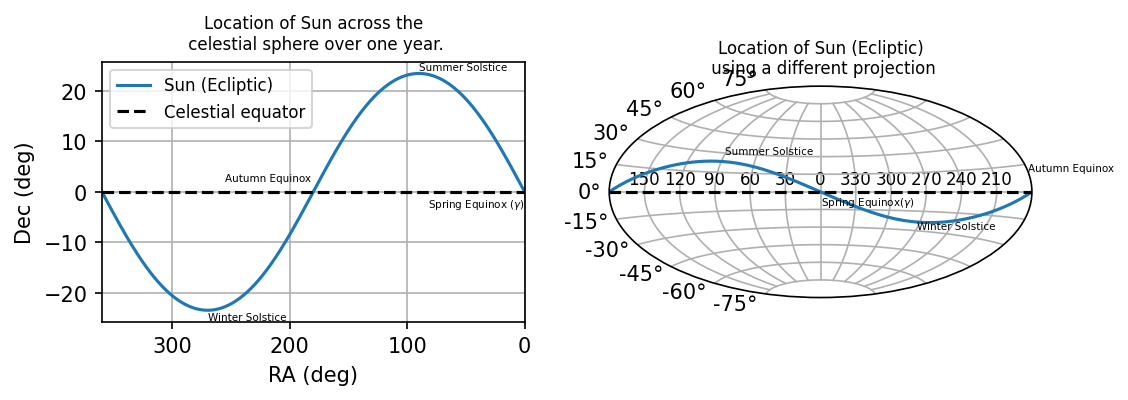

In [11]:
times = np.arange(57192,57192+370,1) #This is just arbitrary MJDs I've chosen, sampled at 5 day intervals.
ts = Time(times,format='mjd',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
with solar_system_ephemeris.set('builtin'):
    sun = get_sun(ts) # Get the location of the Sun
    
ra_order = np.argsort(sun.ra)

ra_rad = sun.ra.wrap_at(180 * u.deg).radian
dec_rad = sun.dec.radian

#Finally, just sorting the RA and Dec so that the plot looks nice.
ra_rad_order = np.argsort(ra_rad)
ra_rad = ra_rad[ra_rad_order]
dec_rad = dec_rad[ra_rad_order]

plt.figure(figsize=(8,2.3),dpi=150)
plt.subplot(121)
plt.grid(True)
plt.title("Location of Sun across the\n celestial sphere over one year.",fontsize=8)
plt.plot(sun.ra[ra_order],sun.dec[ra_order],'-', label="Sun (Ecliptic)") 
plt.axhline(0,color='k',ls='--', label="Celestial equator")
plt.ylabel("Dec (deg)")
plt.xlabel("RA (deg)")
plt.xlim(360,0) # Inverting the x-axis
plt.text(82,-3,r"Spring Equinox ($\gamma$)",fontsize=5)
plt.text(90,24.0,"Summer Solstice",fontsize=5)
plt.text(255,2,"Autumn Equinox",fontsize=5)
plt.text(270,-25.5,"Winter Solstice",fontsize=5)
plt.legend(fontsize=8)

ax = plt.subplot(122, projection="aitoff")
ax.grid(True)
ax.set_title("Location of Sun (Ecliptic)\n using a different projection",fontsize=8)
ax.plot(ra_rad*-1, dec_rad, '-') # Mollweide projection doesn't support axes which increase right to left, so we need to invert everything
ax.axhline(0,color='k',ls='--')
ax.text(0,-0.2,"Spring Equinox($\gamma$)",fontsize=5)
ax.text(-np.pi/2,0.5,"Summer Solstice",fontsize=5)
ax.text(np.pi/2,-0.5,"Winter Solstice",fontsize=5)
ax.text(np.pi,0.2,"Autumn Equinox",fontsize=5)
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210]) # Defining custom labels, as mollweide works in -180 degrees to 180 degrees (and we want 0 to 
ax.set_xticklabels(tick_labels, zorder = 15,fontsize=8)
plt.savefig("Figures/Sun_Track.png")
plt.show()

## The Equatorial Coordinate System

So, for any given object, its position on the sky is given as:
- **Declination** ($\delta$) with respect to the celestial equator (equivalent to "Latitude")
- **Right Ascension** with ($\alpha$) respect to the Spring Equinox $\gamma$ (equivalent to "Longitude")

This is known as the equatorial coordinate system, with Right ascension measured Eastwards from the location of the vernal equinox ($\gamma$). This system is independant of the rotation of the Earth.

![Celestial Sphere_RA_Dec](Figures/Figure_2.png)

Declination is measured in degrees ($^{\rm{o}}$), minutes('), and seconds(") of arc, and goes between $-90^{\rm{o}}\leq \delta \leq 90^{\rm{o}}$, with negative declination meaning the object is below the celestial equator.

Right ascension is a bit more complicated and is measured in time, and is given in hour angle (hr), minute (min), and seconds. $\alpha$= 0hr 0min 0sec corresponds to $\gamma$, while $\alpha$= 12hr 0min 0sec corresponds to $180^{\rm{o}}$ away from $\gamma$. The reasons for this system will be made clear in the next lecture

## Observing from the Earths Surface
### Declination
Consider an observer standing on the surface of the Earth. The point directly above the observer is known as the zenith, and the line which joins the North celestial pole with the celestial equator that passes directly over head is known as the meridian. Stars are easiest to observe as they pass through the Meridian, as at that point in time, there is a minimum in the atmospheric depth the starlight must pass through to reach the observer.

![Celestial Sphere_RA_Dec](Figures/Zenith.png)

Also, any star whose declination matches the latitude of the observing site will pass through the Zenith. So, for Cork (a latitude of 52$^{o}$), any star that has a declination of +52$^{o}$ will be directly overhead at some stage during the day/night. 

The observing site also sets a relative horizon for the observer. Consider the image below (where we've moved the observer to the limb of the Earth for ease of drawing). The observer is at an latitude of $\theta$. Any star which has a declination greater $\delta > 90^{o}-\theta$ will never set below the observers horizon (meaning they're always visible), while any star with a declination less than ($\delta<-90^{o}+\theta$) will never rise (meaning they're never visible).

![Celestial Sphere_RA_Dec](Figures/Circumpolar_example.png)

<div class="alert alert-block alert-info">
<b>Example: Distance from Sirius to the Zenith</b>

What is the minimum angular distance between Sirius and the zenith as viewed from Cork (latitude 52$^{o}$)? What altitude above the horizon will it be at this time?
Sirius is (approximately) located at 
- $\alpha$ = 06 hr 45 min
- $\delta$ = -16$^{o}$ 42'

It will therefore be closest to the zenith when passing through the meridian ($\Delta\alpha$=0). At this time, the angle between the zenith and Sirius will be $52^{o}-(-16^{o} 42')=68^{o} 42'$. Since the angle between the zenith and the horizon is $90^{o}$, then the altitude of Sirius will be $90^{o}-68^{o} 42'=21^{o} 18'$.
</div>

<!-- <div class="alert alert-block alert-info">
<b>Example: Is $\alpha$-Cru every visible from Cork? If not, what is the minimum angle below the horizon it reaches?</b>
$\alpha$-Cru is (approximately) located at 
- $\alpha$ = 12 hr 26 min
- $\delta$ = -63$^{o}$ 05'

Stars with an declination of $\delta<-90^{o}+52=-38$ degrees are never visible from Cork. The minimum angle $\alpha$-Cru reaches is $-63+35=-25$ degrees.
</div> -->

### Sidereal Day

As a species, we have defined a day as the time it takes for consecutive passes of the Sun through the same point of the sky. This takes 24 hours, and is called a Solar (civil) day. In the last lecture, we found that the relationship between the synodic period (S) and the sidereal period (P) is given by:

$$
    \frac{1}{S} = \frac{1}{P_\oplus}-\frac{1}{P} (P>P_\oplus)\\ 
    \frac{1}{S} = \frac{1}{P}-\frac{1}{P_\oplus} (P<P_\oplus)
$$

As we can now see, this means what we're measuring is **not** the true rotation period of the Sun, but is the Earth's synodic rotation period. To see this more clearly, look at the below diagram. Between consecutive passes of the Sun through the same spot onthe sky, the Earth has moved in its orbit and has rotated ~361$^{\rm o}$. As such, we can use the above equation to solve for the true period of the Earth. Here, S=24 hours. So, using the second equation (as the period we are interested in is less than 1 year), we find that P = 23 hours and 56 minutes. This is a **sidereal day**.

![Celestial Sphere](Figures/Sidereal_Day.png)

### Right Ascension (Time)

So a civil day (from now on, just referred to as day) lasts for 24 hours. However, the sidereal day lasts for 23 hours and 56 minutes. This means stars will rise and set 4 minutes earlier every day. Also, as stars move across the night sky, telescopes must track them at the sidereal rate.

The right ascension of an object ($\alpha$) is defined relative to $\gamma$ in previous diagrams. $\gamma$ is taken to be the position of the Sun on the Vernel equinox, which will occur at 2023-03-20 03:06 this year.

Now, from Greenwich, the sun passes through the meridian at noon. As such, any other star which lies on the meridian at noon from Greenwich has $\alpha=0$ hrs. Furthermore, at midnight (12 hours later) any star lying on the meridian as observed from Greenwich will have $\alpha=12$ hrs. This is the ideal time to observe a source with $\alpha=12$, as it is at it's closest point to the Zenith, minimising the atmosphereic effects which hinder observations.

One month later (towards the end of April), stars which are passing through the meridian at midnight will have a difference in right ascension of
$$
  \alpha=\frac{4 {\rm min}}{60 {\rm min}}\times30+12 {\rm hr}=14 {\rm hr}
$$

It's also important to note that when a star is on the meridian from Greenwich (longitude of 0$^o$), it **is not** from other observing sites. Take Cork (longitude=8.5$^{o}$ West) as an example. A star will pass through our meridian
$$
    \frac{8.5}{360}\times24\times60=34 \: {\rm min}
$$
later than when it passed through the meridian from Greenwich.

**Exercise: Work out this difference between Dublin and Cork.**

The time between equinoxes is ~ 365.25 days. Because of this, the time of the equinox shifts by ~ 6 hours every year.

This date has always been important in religions. For example, Easter is the first Sunday after the first full moon after the Spring equinox. Irish monks played an important role in developing the "Computus", which calculated the date of Easter with respect to the equinox.

### Precession of the Earth's rotational axis

#### Reference Epochs
While this system is independant of the rotation of the Earth because we are defining everything relative to a fixed point ($\gamma$, the location at which the ecliptic intersects the celestial equator at the spring equinox), it is **not** independant of the precession of the Earth's axis.

The Earth's rotational axis precesses around its orbital axis with a period of 26,000 years, with the angle between the rotational axis and orbital axis being 23.6$^{\rm o}$. This causes a very slow shift in the positions of the stars, and is one of the reasons a reference epoch for coordinates is specified.

Consider the diagram below. Right now, the Celestial North Pole is pointing approximately towards Polaris. However, in 13,000 years, the NCP will be pointing away from Polaris, meaning it will no longer be the North star.

![Celestial Sphere](Figures/Precession.png)

So, we must specify an epoch which the coordiantes are correct for. The most common epoch is the J2000 epoch, which uses a reference date of noon at Greenwich on January 1 2000. Whenan object coordinates are given with this epoch, they can then be precessed to match the current observation date. The other common reference epoch is B1950, which is midnight on January 1, 1950.

### Reference Times

The time at which an astronomical event (a supernova, an eclipse, a gamma-ray burst) usually occurs is typically given in Julian days (JD). This is the time which has lapsed, in days, since noon at Greenwich on January 1, 4713 BC. There are variants such as the Modified Julian Date (MJD), which is the time in days since midnight, November 17 1858. MJD is typically used instead of JD simply because it removes a very large constant. The below code shows todays JD and MJD (as computed when I last evaluated this cell).

In [2]:
ut = Time(datetime.utcnow(), scale='utc')

print(f"The current time is: {ut.isot}")
print(f"The current time in JD is: {ut.jd}")
print(f"The current time in MJD is: {ut.mjd}")

The current time is: 2024-01-18T18:40:30.854
The current time in JD is: 2460328.278134884
The current time in MJD is: 60327.77813488374


## Equation of Time

Consider again the position of the Sun on the celestial sphere. If we used a sundial to time how long it took between consecutive passes of the Sun through the meridian, and also measured out 24 hours, what would it look like? If the orbit of the Earth were perfectly circular and the rotational axis of the Earth was perpendicular to the orbital plane, it should always be 0.

However, our orbit is elliptical and the Earth's rotational axis is not perpendicular to the orbital plane (obliquity). As such, the time between transits (Apparent Solar Time) is different to the time measured using a stop watch (Mean Solar Time), as shown in the plot below. This correction is known as the Equation of Time.

This means if you were timing your days using the Sun, you would be slower in June and November than if you used a stopwatch, and faster in January and August.

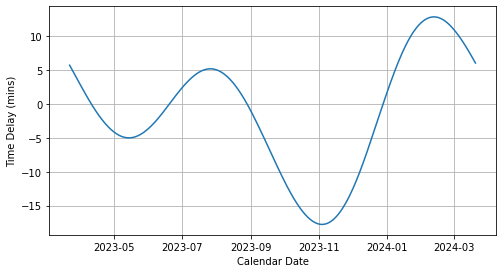

In [3]:
base = datetime(2024,3,20,12,0,0,0)
times = [base - timedelta(days=x) for x in range(365)]
ts = Time(times,format='datetime',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
with solar_system_ephemeris.set('builtin'):
    sun = get_sun(ts) # Get the location of the Sun
EoT = (sun.ra-ts.sidereal_time("mean","greenwich"))
EoT[EoT<-300*u.deg]=EoT[EoT<-300*u.deg]+360*u.deg

plt.figure(figsize=(8,4.2))
plt.subplot(111)
plt.grid(True)
plt.plot(times,EoT.hour*60)
plt.xlabel("Calendar Date")
plt.ylabel("Time Delay (mins)")
plt.savefig("Figures/EoT.svg")
plt.show()